In [16]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import pandas as pd

In [17]:
import json
from pprint import pprint

with open('/Users/danielkershaw/PycharmProjects/DiffusionSimulation/output/twitter-geo-simulation') as data_file:    
    data = json.load(data_file)
    
result_act = pd.read_json(data["result_act"])
result_user = pd.read_json(data["result_user"])

In [18]:
result_act

,ActivateionExposure,ActivateionExposure_m1,ActivateionExposure_m2,ActivateionExposure_m3,ActivateionExposure_m4,UserExposure,UserExposure_m1,UserExposure_m2,UserExposure_m3,UserExposure_m4,...,userUsageEntorpy,userUsageEntorpy_m1,userUsageEntorpy_m2,userUsageEntorpy_m3,userUsageEntorpy_m4,userusagedominance,userusagedominance_m1,userusagedominance_m2,userusagedominance_m3,userusagedominance_m4
0,1.000000,0.000000,1.000000,0.500000,0.875000,1.000000,0.000000,1.000000,0.500000,0.875000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.757812,0.000000,1.035156,1.042969,1.210938,0.757812,0.000000,1.035156,1.042969,1.210938,...,0.633580,0.606504,0.674194,0.005415,0.154334,0.542969,0.562500,0.513672,0.996094,0.888672
2,0.921875,0.003906,1.519531,0.781250,2.230469,0.921875,0.003906,1.519531,0.718750,2.230469,...,0.880641,1.008359,1.057981,0.329326,0.141724,0.489583,0.398438,0.360677,0.826823,0.925781
3,1.152344,0.761719,2.058594,0.425781,3.148438,1.152344,0.761719,2.042969,0.425781,3.148438,...,0.863720,1.051905,1.204843,0.650037,0.140126,0.543945,0.491211,0.378581,0.681641,0.936523
4,2.109375,0.574219,1.371094,0.976562,1.527344,2.109375,0.574219,1.371094,0.890625,1.527344,...,0.977866,1.153477,1.355360,0.964550,0.390375,0.471094,0.400000,0.303906,0.517578,0.835156
5,1.488281,0.046875,1.308594,1.226562,3.812500,1.488281,0.046875,1.308594,1.156250,3.812500,...,1.125034,1.367037,1.435824,0.990104,0.381700,0.444271,0.356771,0.346745,0.453776,0.847005
6,1.386719,0.089844,2.093750,0.593750,3.992188,1.386719,0.089844,2.093750,0.593750,3.976562,...,1.081577,1.557282,1.430678,1.177269,0.350726,0.518787,0.311384,0.318638,0.385026,0.868862
7,3.144531,1.121094,1.742188,1.304688,2.609375,3.144531,1.121094,1.742188,1.234375,2.593750,...,1.036001,1.575509,1.422250,1.157802,0.328464,0.570243,0.343750,0.346470,0.418601,0.883022
8,3.222656,1.375000,2.480469,2.660156,5.761719,3.207031,1.375000,2.449219,1.347656,5.621094,...,1.068717,1.616901,1.561552,1.112736,0.401114,0.583984,0.305556,0.312066,0.492355,0.833767
9,2.183594,0.878906,3.070312,1.207031,5.875000,2.183594,0.878906,3.070312,1.199219,5.750000,...,1.142643,1.625372,1.615531,1.154256,0.385470,0.553602,0.278906,0.293533,0.490380,0.848437


In [19]:
with open('/Users/danielkershaw/PycharmProjects/DiffusionSimulation/output/twitter-geo-innovation') as data_file:    
    data = json.load(data_file)
    
result_act_real = pd.read_json(data["result_act"])
result_user_real = pd.read_json(data["result_user"])

In [20]:
result_act = result_act.join(result_act_real, rsuffix="_m6")
result_user = result_user.join(result_user_real, rsuffix="_m6")

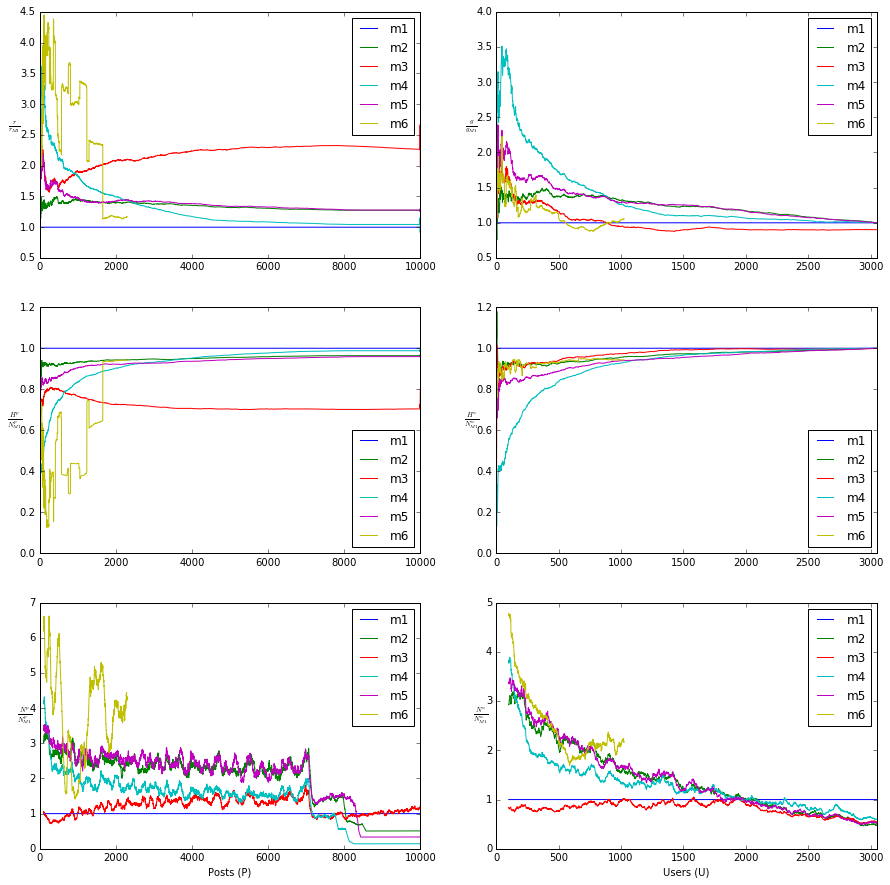

In [22]:
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(15,15))

def ratio(n, w):
    if n == 0:
        return 0
    
    if w == 0:
        return 0
    
    return  n/w

def rowRatio(data):
    d = {
        "m1":ratio(data["m1"], data["m1"]),
        "m2":ratio(data["m2"], data["m1"]),
        "m3":ratio(data["m3"], data["m1"]),
        "m4":ratio(data["m4"], data["m1"]),
        "m5":ratio(data["m5"], data["m1"]),
        "m6":ratio(data["m6"], data["m1"])
    }
    return pd.Series(d)

usagedominance = result_act[["usagedominance_m1","usagedominance_m2","usagedominance_m3","usagedominance_m4","usagedominance", "usagedominance_m6"]]
usagedominance.columns = ['m1', 'm2', 'm3', 'm4', 'm5', 'm6']
usagedominance = usagedominance.apply(rowRatio,1)

plts = usagedominance.plot(ax=axes[0,0])
plts.set_xlabel('')
plts.set_ylabel(r'$\frac{r}{r_{M1}}$', rotation=0)

userusagedominance = result_user[["userusagedominance_m1","userusagedominance_m2","userusagedominance_m3","userusagedominance_m4","userusagedominance","userusagedominance_m6"]]
userusagedominance.columns = ['m1', 'm2', 'm3', 'm4', 'm5', 'm6']
userusagedominance = userusagedominance.apply(rowRatio,1)

plts = userusagedominance.plot(ax=axes[0,1])
plts.set_xlabel('')
plts.set_ylabel(r'$\frac{g}{g_{M1}}$', rotation=0)

usageEntorpy = result_act[["usageEntorpy_m1","usageEntorpy_m2","usageEntorpy_m3","usageEntorpy_m4","usageEntorpy","usageEntorpy_m6"]]
usageEntorpy.columns =['m1', 'm2', 'm3', 'm4', 'm5', 'm6']
usageEntorpy = usageEntorpy.apply(rowRatio,1)

plts = usageEntorpy.plot(ax=axes[1,0])
plts.set_xlabel('')
plts.set_ylabel(r'$\frac{H^p}{N_{M1}^p}$', rotation=0)

userUsageEntorpy = result_user[["userUsageEntorpy_m1","userUsageEntorpy_m2","userUsageEntorpy_m3","userUsageEntorpy_m4","userUsageEntorpy","userUsageEntorpy_m6"]]
userUsageEntorpy.columns = ['m1', 'm2', 'm3', 'm4', 'm5', 'm6']
userUsageEntorpy = userUsageEntorpy.apply(rowRatio,1)

plts = userUsageEntorpy.plot(ax=axes[1,1])
plts.set_xlabel('')
plts.set_ylabel(r'$\frac{H^u}{N_{M1}^u}$', rotation=0)

ActivateionExposure = result_act[["ActivateionExposure_m1","ActivateionExposure_m2","ActivateionExposure_m3","ActivateionExposure_m4","ActivateionExposure","ActivateionExposure_m6"]]
ActivateionExposure.columns = ['m1', 'm2', 'm3', 'm4', 'm5', 'm6']
ActivateionExposure.loc[:, 'm1'] = ActivateionExposure.loc[:, 'm1'].rolling(window=100,center=False).mean()
ActivateionExposure.loc[:, 'm2'] = ActivateionExposure.loc[:, 'm2'].rolling(window=100,center=False).mean()
ActivateionExposure.loc[:, 'm3'] = ActivateionExposure.loc[:, 'm3'].rolling(window=100,center=False).mean()
ActivateionExposure.loc[:, 'm4'] = ActivateionExposure.loc[:, 'm4'].rolling(window=100,center=False).mean()
ActivateionExposure.loc[:, 'm5'] = ActivateionExposure.loc[:, 'm5'].rolling(window=100,center=False).mean()
ActivateionExposure.loc[:, 'm6'] = ActivateionExposure.loc[:, 'm6'].rolling(window=100,center=False).mean()

ActivateionExposure = ActivateionExposure.apply(rowRatio,1)

plts = ActivateionExposure.plot(ax=axes[2,0])
plts.set_xlabel('Posts (P)')
plts.set_ylabel(r'$\frac{N^p}{N_{M1}^p}$', rotation=0)

UserExposure = result_user[["UserExposure_m1","UserExposure_m2","UserExposure_m3","UserExposure_m4","UserExposure","UserExposure_m6"]]
UserExposure.columns = ['m1', 'm2', 'm3', 'm4', 'm5', 'm6']
UserExposure.loc[:, 'm1'] = UserExposure.loc[:, 'm1'].rolling(window=100,center=False).mean()
UserExposure.loc[:, 'm2'] = UserExposure.loc[:, 'm2'].rolling(window=100,center=False).mean()
UserExposure.loc[:, 'm3'] = UserExposure.loc[:, 'm3'].rolling(window=100,center=False).mean()
UserExposure.loc[:, 'm4'] = UserExposure.loc[:, 'm4'].rolling(window=100,center=False).mean()
UserExposure.loc[:, 'm5'] = UserExposure.loc[:, 'm5'].rolling(window=100,center=False).mean()
UserExposure.loc[:, 'm6'] = UserExposure.loc[:, 'm6'].rolling(window=100,center=False).mean()
UserExposure = UserExposure.apply(rowRatio,1)

plts = UserExposure.plot(ax=axes[2,1])
plts.set_xlabel('Users (U)')
plts.set_ylabel(r'$\frac{N^u}{N_{M1}^u}$', rotation=0)

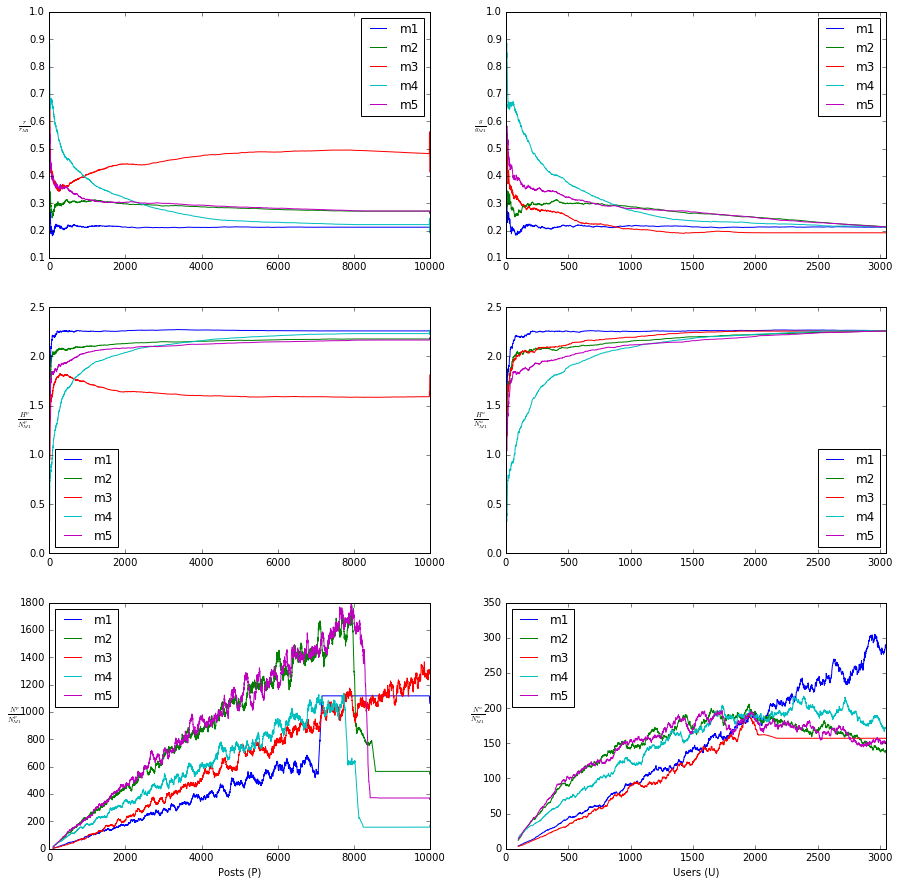

In [23]:
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(15,15))

def ratio(n, w):
    if n == 0:
        return 0
    
    if w == 0:
        return 0
    
    return  n/w

def rowRatio(data):
    d = {
        "m1":ratio(data["m1"], data["m1"]),
        "m2":ratio(data["m2"], data["m1"]),
        "m3":ratio(data["m3"], data["m1"]),
        "m4":ratio(data["m4"], data["m1"]),
        "m5":ratio(data["m5"], data["m1"])
    }
    return pd.Series(d)

usagedominance = result_act[["usagedominance_m1","usagedominance_m2","usagedominance_m3","usagedominance_m4","usagedominance"]]
usagedominance.columns = ['m1', 'm2', 'm3', 'm4', 'm5']
# usagedominance = usagedominance.apply(rowRatio,1)

plt = usagedominance.plot(ax=axes[0,0])
plt.set_xlabel('')
plt.set_ylabel(r'$\frac{r}{r_{M1}}$', rotation=0)

userusagedominance = result_user[["userusagedominance_m1","userusagedominance_m2","userusagedominance_m3","userusagedominance_m4","userusagedominance"]]
userusagedominance.columns = ['m1', 'm2', 'm3', 'm4', 'm5']
# userusagedominance = userusagedominance.apply(rowRatio,1)

plt = userusagedominance.plot(ax=axes[0,1])
plt.set_xlabel('')
plt.set_ylabel(r'$\frac{g}{g_{M1}}$', rotation=0)

usageEntorpy = result_act[["usageEntorpy_m1","usageEntorpy_m2","usageEntorpy_m3","usageEntorpy_m4","usageEntorpy"]]
usageEntorpy.columns = ['m1', 'm2', 'm3', 'm4', 'm5']
# usageEntorpy = usageEntorpy.apply(rowRatio,1)

plt = usageEntorpy.plot(ax=axes[1,0])
plt.set_xlabel('')
plt.set_ylabel(r'$\frac{H^p}{N_{M1}^p}$', rotation=0)

userUsageEntorpy = result_user[["userUsageEntorpy_m1","userUsageEntorpy_m2","userUsageEntorpy_m3","userUsageEntorpy_m4","userUsageEntorpy"]]
userUsageEntorpy.columns = ['m1', 'm2', 'm3', 'm4', 'm5']
# userUsageEntorpy = userUsageEntorpy.apply(rowRatio,1)

plt = userUsageEntorpy.plot(ax=axes[1,1])
plt.set_xlabel('')
plt.set_ylabel(r'$\frac{H^u}{N_{M1}^u}$', rotation=0)

ActivateionExposure = result_act[["ActivateionExposure_m1","ActivateionExposure_m2","ActivateionExposure_m3","ActivateionExposure_m4","ActivateionExposure"]]
ActivateionExposure.columns = ['m1', 'm2', 'm3', 'm4', 'm5']
ActivateionExposure.loc[:, 'm1'] = ActivateionExposure.loc[:, 'm1'].rolling(window=100,center=False).mean()
ActivateionExposure.loc[:, 'm2'] = ActivateionExposure.loc[:, 'm2'].rolling(window=100,center=False).mean()
ActivateionExposure.loc[:, 'm3'] = ActivateionExposure.loc[:, 'm3'].rolling(window=100,center=False).mean()
ActivateionExposure.loc[:, 'm4'] = ActivateionExposure.loc[:, 'm4'].rolling(window=100,center=False).mean()
ActivateionExposure.loc[:, 'm5'] = ActivateionExposure.loc[:, 'm5'].rolling(window=100,center=False).mean()
# ActivateionExposure = ActivateionExposure.apply(rowRatio,1)

plt = ActivateionExposure.plot(ax=axes[2,0])
plt.set_xlabel('Posts (P)')
plt.set_ylabel(r'$\frac{N^p}{N_{M1}^p}$', rotation=0)

UserExposure = result_user[["UserExposure_m1","UserExposure_m2","UserExposure_m3","UserExposure_m4","UserExposure"]]
UserExposure.columns = ['m1', 'm2', 'm3', 'm4', 'm5']
UserExposure.loc[:, 'm1'] = UserExposure.loc[:, 'm1'].rolling(window=100,center=False).mean()
UserExposure.loc[:, 'm2'] = UserExposure.loc[:, 'm2'].rolling(window=100,center=False).mean()
UserExposure.loc[:, 'm3'] = UserExposure.loc[:, 'm3'].rolling(window=100,center=False).mean()
UserExposure.loc[:, 'm4'] = UserExposure.loc[:, 'm4'].rolling(window=100,center=False).mean()
UserExposure.loc[:, 'm5'] = UserExposure.loc[:, 'm5'].rolling(window=100,center=False).mean()
# UserExposure = UserExposure.apply(rowRatio,1)

plt = UserExposure.plot(ax=axes[2,1])
plt.set_xlabel('Users (U)')
plt.set_ylabel(r'$\frac{N^u}{N_{M1}^u}$', rotation=0)